# Lab 8
## Difference in Differences
3/7/2018

### Announcements:
* Problem Set is due next week, with the final problem posted in module 8 on bcourses. We are still waiting to receive/post module 7, but problem 7.1 and all core coding from last week's section can be found in the jupyter notebook for Lab 7. PSA-- don't download your notebook file as an R script to submit for your problem sets-- this will only include your code and not your responses to the questions
* Reminder that office hours for the month of March will be 2pm-4pm Tuesdays in room N355.

### Plan for Today's Lab
1. Graphical DiD analysis (5-10 minutes)
2. Baseline covariate assessment (5 minutes)
3. Regressions for DiD analysis (5-10 minutes)

## 1- Graphical DiD analysis
Often, it can be helpful to start with a graphical analysis of the outcome variable in the treatment and comparison group between the pre-post periods.  Ideally, we would have several points of observation in the pre-period so that we can establish that the treatment and comparison have "parallel trends".  In this case, we'll be looking at data from the OPORTUNIDADES program in Mexico (another poverty reduction program similar to PROGRESA). This program was not randomly assigned, and researchers were only able to track the outcomes after the program had been rolled out.  So, they used a matching algorithm to select "control" villages for comparison. We'll start by looking at the distributions of child years of education between the treatment and control households in the pre period (2000) and post period (2003). Notice that the distribution of the outcome looks about the same in the pre-period, but seems higher than control in the post period.

In [1]:
# Clear Environment 
rm(list = ls())
# Clear Console
cat('\014')

#load packages
# require(foreign)
require(dplyr)
require(ggplot2)


# Set working directory to the location of your data files/
setwd("../Data")

# Read the data 
Panel_Data <- read.csv("DID_OPORTUNIDADES.csv", header = TRUE)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2


In [2]:
# Change plot size to 4 x 3
options(repr.plot.width = 4, repr.plot.height = 3)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 30371 rows containing non-finite values (stat_bin).”

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 46680 rows containing non-finite values (stat_bin).”

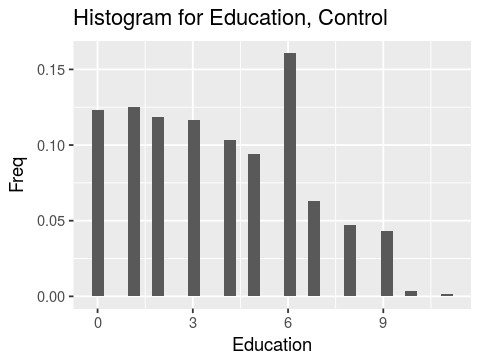

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 23333 rows containing non-finite values (stat_bin).”

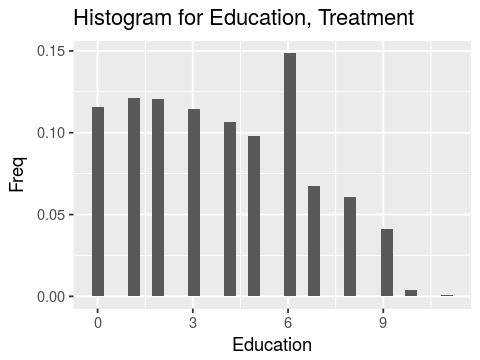

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 87833 rows containing non-finite values (stat_bin).”

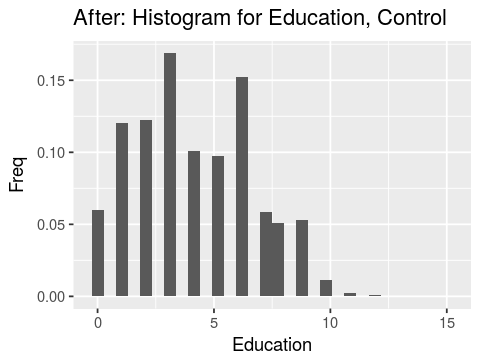

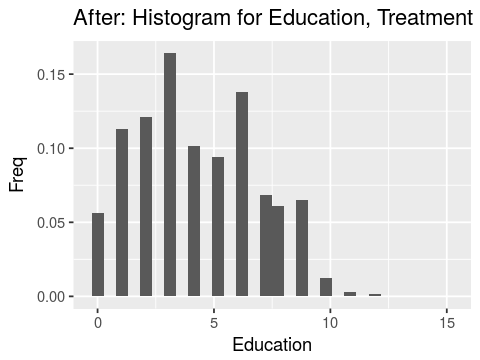

In [3]:
# Graphical Analysis 
# Compare distribution at baseline year 2000
Panel_Data_2000_0 <- subset(Panel_Data, D=="Control" & year == 2000)
Panel_Data_2000_1 <- subset(Panel_Data, D=="Treated" & year == 2000)

# Calculating proportions between control and treatment for different Education
ggplot(data=Panel_Data_2000_0, aes(Panel_Data_2000_0$edu_child)) + 
  geom_histogram(aes(y=..count../sum(..count..))) +
  labs(title="Histogram for Education, Control") +
  labs(x="Education", y="Freq")

ggplot(data=Panel_Data_2000_1, aes(Panel_Data_2000_1$edu_child)) + 
  geom_histogram(aes(y=..count../sum(..count..))) +
  labs(title="Histogram for Education, Treatment") +
  labs(x="Education", y="Freq")

# Compare distribution at followup year 2003
Panel_Data_2003_0 <- subset(Panel_Data, D=="Control" & year == 2003)
Panel_Data_2003_1 <- subset(Panel_Data, D=="Treated" &  year == 2003)

# Calculating proportions between control and treatment for different Education
ggplot(data=Panel_Data_2003_0, aes(Panel_Data_2003_0$edu_child)) + 
  geom_histogram(aes(y=..count../sum(..count..))) +
  labs(title="After: Histogram for Education, Control") +
  labs(x="Education", y="Freq") 

ggplot(data=Panel_Data_2003_1, aes(Panel_Data_2003_1$edu_child)) + 
  geom_histogram(aes(y=..count../sum(..count..))) +
  labs(title="After: Histogram for Education, Treatment") +
  labs(x="Education", y="Freq") 


#### Here below are 3 methods to reproduce the plots above.

In [12]:
# Import data first
did <- read.csv("../Data/DID_OPORTUNIDADES.csv", header = TRUE) %>%
  filter(year %in% c(2000, 2003), !is.na(edu_child)) 

In [13]:
unique(did$edu_child)
unique(did$D)

[1]  4  3  0  6  9  1  5  2 11  8  7 10 13 12 15 14

[1] Control Treated
Levels: Control Treated

In [6]:
# Define a function to arrange plot for comparison
library(grid)
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols), byrow = TRUE)
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

Warning message:
“Removed 46680 rows containing non-finite values (stat_bin).”Warning message:
“Removed 30371 rows containing non-finite values (stat_bin).”Warning message:
“Removed 87833 rows containing non-finite values (stat_bin).”Warning message:
“Removed 23333 rows containing non-finite values (stat_bin).”

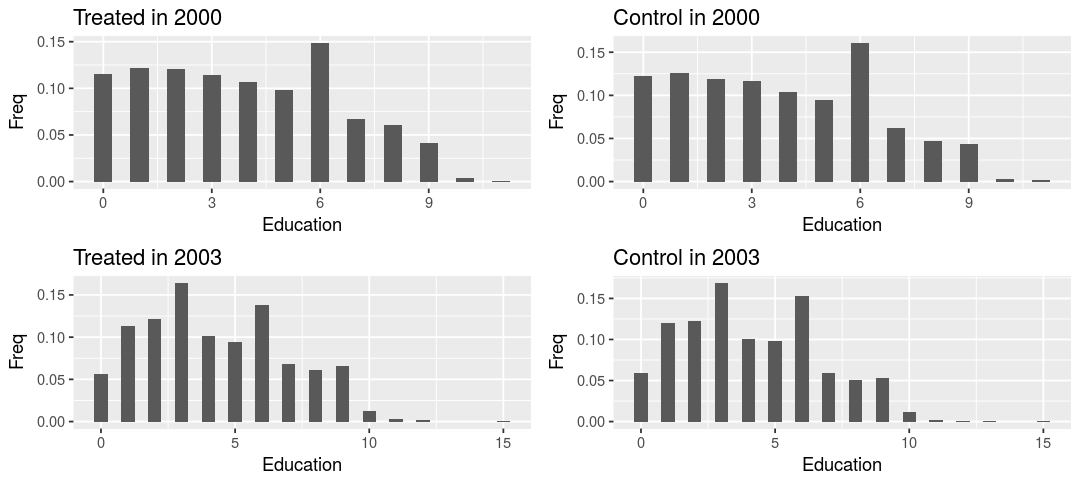

In [7]:
# Method 1: Plot one by one
# data
PlotHist <- function(year_value, D_value) { # year_value = 2000/2003, D_value = "Treated"/"Control"
  did %>% filter(year == year_value, D == D_value) %>%
    ggplot() +
    aes(x = edu_child, y = ..count../sum(..count..)) +
    geom_histogram(binwidth = 0.5) +
    ggtitle(paste0(D_value, " in ", year_value)) +
    xlab("Education") +
    ylab("Freq")
}

options(repr.plot.width = 9, repr.plot.height = 4)
multiplot(
  PlotHist(2000, "Treated"),
  PlotHist(2000, "Control"),
  PlotHist(2003, "Treated"),
  PlotHist(2003, "Control")
  , cols = 2)

Note that in Method 1, the x-axis extends to 15 in 2003 while the x-axis in 2000 ends at 11. A better way will be using the same range of x-axis for comparison.

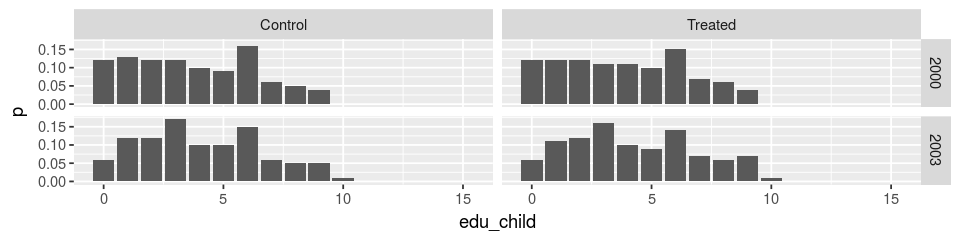

In [14]:
# Method 2: Plot one by one in one command using `facet_grid`
d_m2 <- did %>%
  select(edu_child, year, D)  %>%
  add_count(year, D) %>%
  add_count(edu_child, year, D) %>%
  unique %>% 
  mutate(p = round(nn/n, 2)) %>% ungroup

ggplot(d_m2, aes(x = edu_child, y = p)) +
  geom_col() +
  facet_grid(year ~ D)

Note that in Method 2, the x-axis and y-axis are the same across treated/control, 2010/2013.

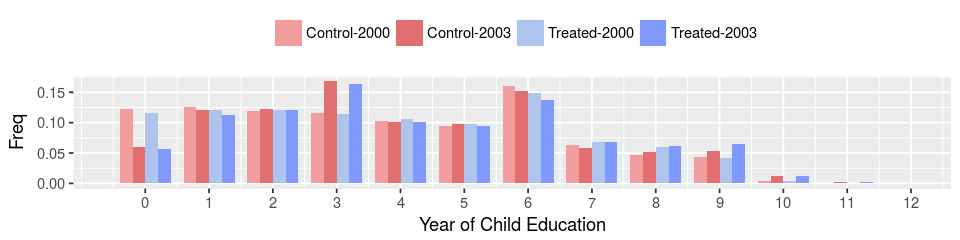

In [15]:
# Method 3: An ideal visualization for comparison will be to plot all bars side by side in one plot
options(repr.plot.width = 8, repr.plot.height = 2)
d_m3 <- did %>%
  mutate(group_year = paste0(D, "-", year))

ggplot(d_m3, aes(x = edu_child, y = ..prop.., fill = group_year)) +
  geom_bar(position = "dodge", width = 0.8, na.rm = T) +
  scale_fill_manual(values = c("#f29d9d", "#e26f6f", "#afc4ed", "#8099fc")) +
  scale_x_continuous(limits = c(-0.5, 12), breaks = 0:12) +
  theme(legend.position = "top", legend.title = element_blank()) +
  xlab("Year of Child Education") +
  ylab("Freq")

In the graph from Method 3 above, it is easy to compare the Y difference at each point of distribution on x-axis.

## 2-Baseline Covariate Assessment
In addition to checking for balance in the outcome in the pre-period, it's also a good idea to check that the chosen control group looks similar to the treatment group in other ways in the pre-period.  We can test other covariates for balance at baseline using the t.test command (repeated using lapply)

In [10]:
# T-tests for different covariates at Baseline
Panel_Data_2000 <- subset(Panel_Data, year == 2000)
lapply(Panel_Data_2000[,c("edu_child","age", "sex", "agehead", "sexhead")], function(x) t.test(x ~ Panel_Data_2000$D, var.equal = TRUE))


$edu_child

	Two Sample t-test

data:  x by Panel_Data_2000$D
t = -2.765, df = 34904, p-value = 0.005696
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.13702955 -0.02334381
sample estimates:
mean in group Control mean in group Treated 
             3.815461              3.895648 


$age

	Two Sample t-test

data:  x by Panel_Data_2000$D
t = 1.8414, df = 111930, p-value = 0.06557
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01500806  0.48106650
sample estimates:
mean in group Control mean in group Treated 
             25.45909              25.22606 


$sex

	Two Sample t-test

data:  x by Panel_Data_2000$D
t = 2.627, df = 100830, p-value = 0.008615
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.002142699 0.014735157
sample estimates:
mean in group Control mean in group Treated 
            0.5055985             0.497159

## 3- Regressions for DiD analysis
To estimate the treatment effect, we run a regression with the following as explanatory variables: an indicator for post intervention, an indicator for the treatment group, and an indicator that is the interaction of post and treatment.  The coefficient on the interaction term tells us the treatment effect.   We can also include additional controls-- this is usually a good idea when we are less confidence that our comparison group closely matches our treatment group.

In [11]:
# Regression Model
# Recoding D to 0 and 1 for Control and Treated
Panel_Data$D <- ifelse(Panel_Data$D == "Control", 0, ifelse(Panel_Data$D == "Treated", 1, NA))
# Adding the interaction term 
Panel_Data$D_period <- Panel_Data$D * Panel_Data$period
Panel_Data_model <- lm(edu_child ~ D_period+D+period, data = Panel_Data)
summary(Panel_Data_model)

# Adding Controls 
Panel_Data_model_wControls <- lm(edu_child ~ D_period+D+period+age+sex+agehead+sexhead, data = Panel_Data)
summary(Panel_Data_model_wControls)


Call:
lm(formula = edu_child ~ D_period + D + period, data = Panel_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2882 -2.2882 -0.2882  2.1044 10.8670 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.81546    0.02261 168.719  < 2e-16 ***
D_period     0.07501    0.04196   1.788  0.07385 .  
D            0.08019    0.02901   2.764  0.00571 ** 
period       0.31759    0.03531   8.993  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.647 on 82615 degrees of freedom
  (384219 observations deleted due to missingness)
Multiple R-squared:  0.005758,	Adjusted R-squared:  0.005722 
F-statistic: 159.5 on 3 and 82615 DF,  p-value: < 2.2e-16



Call:
lm(formula = edu_child ~ D_period + D + period + age + sex + 
    agehead + sexhead, data = Panel_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9457 -0.6999  0.0630  0.9604  8.6083 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -3.908810   0.029793 -131.197  < 2e-16 ***
D_period     0.015746   0.024487    0.643  0.52019    
D            0.103376   0.017377    5.949 2.71e-09 ***
period       0.295866   0.020491   14.439  < 2e-16 ***
age          0.710285   0.001788  397.316  < 2e-16 ***
sex          0.096671   0.010725    9.014  < 2e-16 ***
agehead     -0.001359   0.000480   -2.831  0.00464 ** 
sexhead     -0.094090   0.019249   -4.888 1.02e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.497 on 77919 degrees of freedom
  (388911 observations deleted due to missingness)
Multiple R-squared:  0.6802,	Adjusted R-squared:  0.6802 
F-statistic: 2.368e+04 on 7 and 77919 DF,  p-valu

**How to interprete**

Look at the coefficient of `D_period` and its p-value.

model | coefficient of D_period | p-value
--- | --- | ---
model1 | 0.07501   | 0.07385
model2 (with control) | 0.015746  |  0.52019